# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)

# 셀을 실행할 때 팝업이 뜨면 `무시하고 계속하기` 를 눌러주세요


## 데이터 다운로드
---
아래 셀을 실행시켜 데이터를 colab 에 불러옵니다.
셀 실행은 Ctrl + Enter 를 이용해 실행시킬 수 있습니다.

In [20]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2023-01-29 15:40:52--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2023-01-29 15:40:52--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 108.177.125.102, 108.177.125.113, 108.177.125.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ei2j4js95j2uqdvru21jdm82hv3nnqbl/1675006800000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download&uuid=3697746f-8646-489d-a707-553f323c3236 [following]
--2023-01-29 15:40:53--  https://doc-10-10-doc

In [21]:
# 라이브러리 불러오기

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [22]:
train = pd.read_csv('data/train.csv')

# Scailing
scaler = MinMaxScaler()
scaler.fit(train[['fixed acidity']])
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])

# Encoding
encoder = OneHotEncoder()
encoder.fit(train[['type']])
onehot = encoder.transform(train[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
train = pd.concat([train, onehot], axis = 1)
train = train.drop(columns = ['type'])
train.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.148760,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0.413223,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.338843,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.264463,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.330579,0.0,1.0


## 👋 실습
---

In [23]:
# sklearn에 model_selection 부분 속 KFold를 불러와보세요
from sklearn.model_selection import KFold

In [24]:
# KFold에 n_splits = 5, shuffle = True, random_state = 0이라는 인자를 추가해 "kf"라는 변수에 저장해보세요
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [25]:
# 반복문을 통해서 1번부터 5번까지의 데이터에 접근해보세요
for t, v in kf.split(train):
  train_data = train.iloc[t]
  valid_data = train.iloc[v]
  print(train_data)

      index  quality  fixed acidity  volatile acidity  citric acid  \
0         0        5            5.6             0.695         0.06   
1         1        5            8.8             0.610         0.14   
2         2        5            7.9             0.210         0.39   
3         3        6            7.0             0.210         0.31   
5         5        6            6.0             0.190         0.37   
...     ...      ...            ...               ...          ...   
5491   5491        7            6.9             0.340         0.30   
5492   5492        5            7.7             0.150         0.29   
5494   5494        7            7.8             0.150         0.34   
5495   5495        5            6.6             0.410         0.31   
5496   5496        6            7.0             0.350         0.17   

      residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0                6.8      0.042                  9.0                  84.0   
1  

## 정답
---

In [26]:
# sklearn에 model_selection 부분 속 KFold를 불러와보세요
from sklearn.model_selection import KFold

In [27]:
# KFold에 n_splits = 5, shuffle = True, random_state = 0이라는 인자를 추가해 "kf"라는 변수에 저장해보세요
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [28]:
# 반복문을 통해서 1번부터 5번까지의 데이터에 접근해보세요

for train_idx, valid_idx in kf.split(train) :
  train_data = train.iloc[train_idx]
  valid_data = train.iloc[valid_idx]

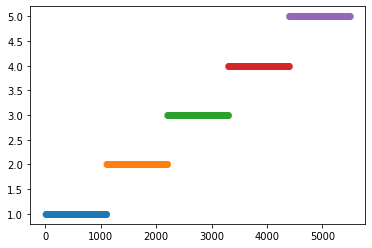

In [35]:
# 이 코드는 순서대로 이해하려 해보세요 :)

import matplotlib.pyplot as plt


kf = KFold(n_splits = 5, shuffle = False)
train_idx_store = []
valid_idx_store = []

i = 1
for train_idx, valid_idx in kf.split(train) :
  plt.scatter(valid_idx, [i for x in range(len(valid_idx))], alpha = 0.1)
  i += 1
plt.show()


## 아래의 이미지는 shuffle = False로 했을 때, 데이터가 겹치지 않게 순서대로 쪼개지는 것을 볼 수 있습니다.

# [↩️ 리스트로 돌아가기](https://dacon.io/competitions/open/235698/overview/description)